# Machine Learning Coursework 1 - Student Number 200546665 

## 1. Exploratory Data Analysis [9 pts]



In [20]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### 1.1. Visualising the data

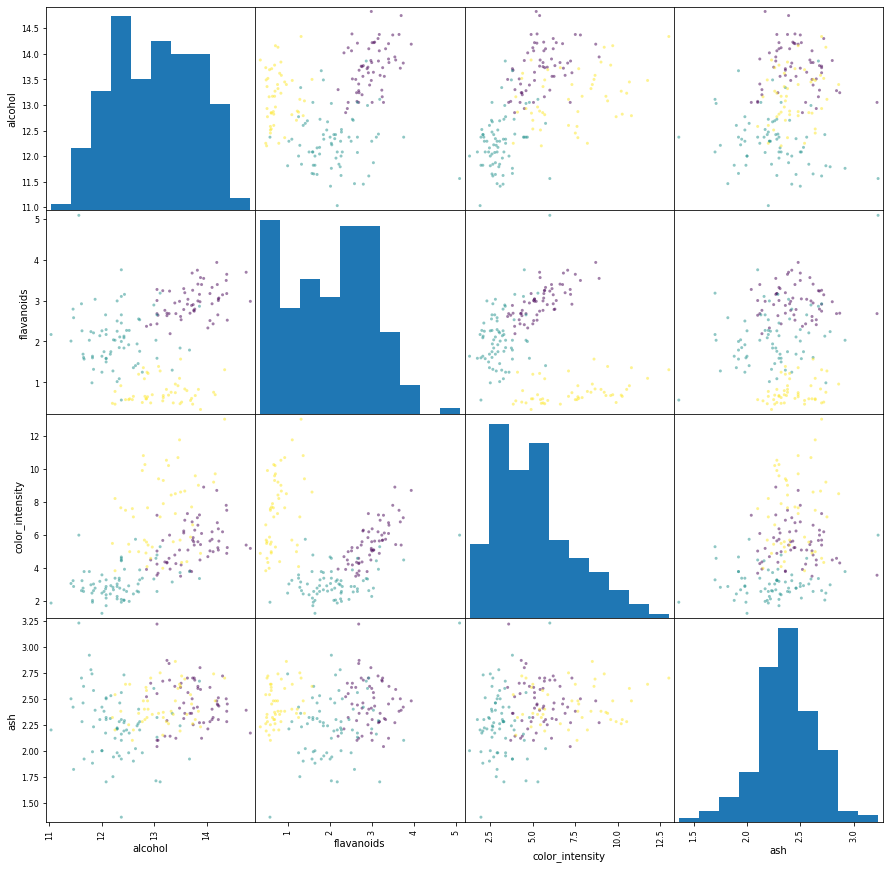

In [21]:
# define plotting function
# +
# run the plotting function

# Load the data
wine = datasets.load_wine()
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# Define features as df & the target
X = df_wine[selected_features]
y = wine.target

# Define plotting function AND run:
pd.plotting.scatter_matrix(X, c=y, alpha=0.5, diagonal='hist', figsize=(15, 15))
plt.show()

### 1.2. Exploratory Data Analysis under noise

     alcohol  flavanoids  color_intensity   ash
0      14.23        3.06             5.64  2.43
1      13.20        2.76             4.38  2.14
2      13.16        3.24             5.68  2.67
3      14.37        3.49             7.80  2.50
4      13.24        2.69             4.32  2.87
..       ...         ...              ...   ...
173    13.71        0.61             7.70  2.45
174    13.40        0.75             7.30  2.48
175    13.27        0.69            10.20  2.26
176    13.17        0.68             9.30  2.37
177    14.13        0.76             9.20  2.74

[178 rows x 4 columns]
       alcohol  flavanoids  color_intensity       ash
0    14.127646    3.299472         5.380281  2.152135
1    14.182890    3.456703         4.426454  2.280873
2    13.544511    3.863217         6.183595  2.021889
3    14.507496    3.604456         8.476458  2.943215
4    12.239181    2.504079         5.154513  2.650715
..         ...         ...              ...       ...
173  14.087042    0.46

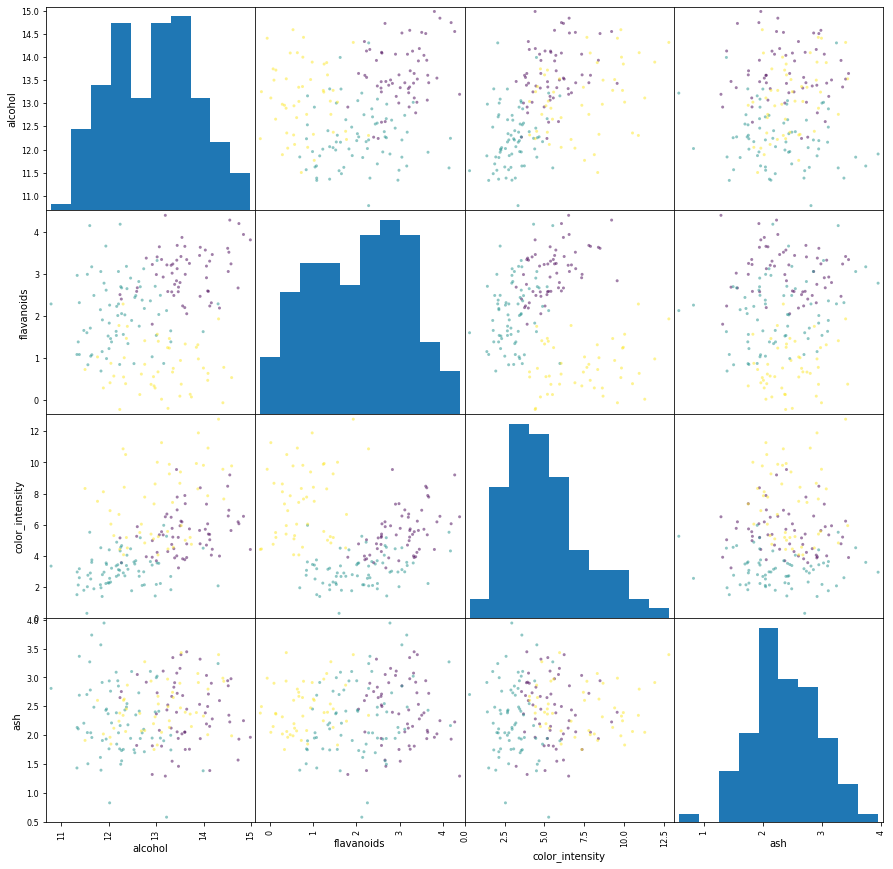

In [22]:
# noise code

# Putting my dataset X in a dataframe
X = df_wine[selected_features]
print(X)

# Creating a noise XN with random seeds, with the same dimension as my X dataset
mySeed = 12345
np.random.seed(mySeed)
XN = X+np.random.normal(0,0.5,X.shape) 
print(XN)

# Invoking the exploratory data analisys function on the noisy version of data X
pd.plotting.scatter_matrix(XN, c=y, alpha=0.5, diagonal='hist', figsize=(15, 15))
plt.show()



### Q1. Exploratory data analysis



#### Answer:


Features are a critical part of any classifier because they capture important characteristics about the nature of the data.
Feature selection has many advantages:

- Help avoid the curse of dimensionality;
- reduce overfitting: 
- increase adaptability and explainability of the models

Given the label we are trying to predict (3 different types of Italian wine 0, 1 or 2) and the exploratory analysis done above, we can see that histograms are, overall, one of the best ways to quickly learn a lot about the data, including central tendency, spread, shape and outliers.
On our dataset, in more detail, we can see that both features 'ash' and 'flavanoids' seem to be normally distributed.
Furthermore, visualizing the distribution gives an idea on whether the data points are more spread out or concentrated to determine whether the variance is high or low.
Low variance features, tend to contribute less to the prediction of the outcome variable.
From the scatter plots above, ash and flavanoids seem to be more concentrated, together with ash and color_intensity.
Eliminating highly correlated features is also an essential step to avoid that these greatly affects the model performance. 
The correlation regression analysis matrix below, calculates the correlation between each of the 4 selected features.
The features with lowest correlation appear to be exactly ash and flavanoids:

Overall, based on my exploratory analysis, if I was to build a classifier using only two of the available features, I would choose ash and flavanoids.



In [23]:
# Correlation Matrix formation
corr_matrix = df_wine.loc[:,selected_features].corr()
print(corr_matrix)

                  alcohol  flavanoids  color_intensity       ash
alcohol          1.000000    0.236815         0.546364  0.211545
flavanoids       0.236815    1.000000        -0.172379  0.115077
color_intensity  0.546364   -0.172379         1.000000  0.258887
ash              0.211545    0.115077         0.258887  1.000000



### Q2. Data with noise



#### Answer:

The added Gaussian noise appears to be adding a normalization effect to the dataset - this is more visible on the on-diagonal histograms which appear to be more normally distributed.
Adding the Gaussian noise is, therefore, a form of regularization which can help later to reduce overfitting in the model for classification.

Overfitting is when the model fits the training data too well but when unseen samples are evaluated during testing, the model fails to generalize and produces results with a very low accuracy.
The model learns the distribution of the data too well so, a remedy to this, could be adding noise so that the model is less able to memorize training samples (because they are changing constantly) and produce predictions with better accuracy.
This can help reducing overfitting but it can also improve the robustness of the model resulting in better generalization and faster learning.


## 2. Implementing kNN [6 pts]


In [24]:
# helper code

# Importing the necessary libraries
import numpy as np

# Getting the dataset
wine = datasets.load_wine()
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# Defining the features in the dataset X, as array values. Specifying the target
X = df_wine[selected_features].values
y = wine.target

# Calculating the Euclidean distance I will be using latern in the KNN classifier:
def Euclidean_distance(x1, x2):
    '''Calculates the Euclidean distance between 2 points x1 and x2, returns a single value'''
    return np.sqrt(np.sum(x1-x2)**2)

# Splitting the dataset and the target into a train and test datasets with numpy. Starting with the dataset X:
# Setting the random seed so results are also replicable, shuffling X and then splitting it
mySeed = 12345
np.random.seed(mySeed)
np.random.shuffle(X)

X_train, X_test = X[:124,:], X[124:,:]

print(X_train.shape)
print(X_train[0])

print(X_test.shape)
print(X_test[0])

# For the target (also of size 124), shufflying the array first and then calculating the train and test datasets:
np.random.seed(mySeed)
np.random.shuffle(y)

y_train, y_test = y[:124], y[124:]

print(y_train.shape)
print(y_train)


print(y_test.shape)
print(y_test)

print(y)






(124, 4)
[11.61  2.92  2.65  2.7 ]
(54, 4)
[12.    2.26  2.5   2.  ]
(124,)
[1 1 2 0 2 0 1 1 2 2 1 1 1 0 0 0 1 1 1 1 2 1 2 2 1 0 2 1 2 0 0 0 2 0 0 0 0
 1 2 0 2 2 0 2 0 0 1 0 2 1 0 1 2 0 1 1 1 1 0 0 1 1 0 0 1 1 0 2 1 0 1 1 2 2
 1 1 0 1 1 1 2 1 1 2 1 2 0 0 1 0 2 0 0 0 2 0 2 2 0 1 0 1 2 2 0 2 0 0 0 1 0
 0 0 1 1 0 1 1 2 2 1 1 0 0]
(54,)
[1 1 0 0 1 2 2 1 0 1 2 0 2 2 1 2 1 1 1 2 2 1 2 1 0 1 2 1 0 2 0 0 0 1 2 1 0
 1 2 1 1 2 1 1 1 0 2 0 1 1 2 2 1 0]
[1 1 2 0 2 0 1 1 2 2 1 1 1 0 0 0 1 1 1 1 2 1 2 2 1 0 2 1 2 0 0 0 2 0 0 0 0
 1 2 0 2 2 0 2 0 0 1 0 2 1 0 1 2 0 1 1 1 1 0 0 1 1 0 0 1 1 0 2 1 0 1 1 2 2
 1 1 0 1 1 1 2 1 1 2 1 2 0 0 1 0 2 0 0 0 2 0 2 2 0 1 0 1 2 2 0 2 0 0 0 1 0
 0 0 1 1 0 1 1 2 2 1 1 0 0 1 1 0 0 1 2 2 1 0 1 2 0 2 2 1 2 1 1 1 2 2 1 2 1
 0 1 2 1 0 2 0 0 0 1 2 1 0 1 2 1 1 2 1 1 1 0 2 0 1 1 2 2 1 0]


In [25]:
# mykNN code

# K Nearest Neighbour Classifier function building. (Pleae see full reference below)

class K_Nearest_Neighbour_Classifier:
    '''Computes a K Nearest Neighbour Classifier function, at a given k'''
    def __init__(self, k):
        '''Stores k - the number of neighbours -  and it will be used at a later moment'''
        self.k = k
    def fit(self, X, y):
        '''Defines and stores the training dataset and the training labels, both will be used later'''
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        '''Predicts the label for each new samples in our test dataset. It will convert the output of the predicted labels,
        into a numpy array.'''
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self,x):
        '''This is the helper method which will get one sample x and calculate the distances with the trained dataset (this is looped for each sample).
        The function then looks both at the nearest neighbours and the labels of the nearest neighbours,
        and ouputs the most common label (either 0, 1 or 2)'''
        # Compute Euclidean distances for each test sample and the train dataset:
        distances = [Euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get k nearest Neighbour sample and get also the labels. 
        k_indices = np.argsort(distances)[:self.k]  # Sort the distances and get the indices of the k nearest sample.
        k_nearest_labels = [self.y_train[i] for i in k_indices] # Return the indices of how it was sorted with the labels.
        # Get the most common label:
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common
# Modelling
clf = K_Nearest_Neighbour_Classifier(k=3)

# Training the dataset
clf.fit(X_train, y_train)

# Predicting on the test dataset
predictions = clf.predict(X_test)
predictions


array([1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 2, 1, 0])

## 3. Classifier evaluation [3 pts]


In [26]:
# Confusion matrix, accuracy, precision, recall (Please see full reference below) 

# Confusion matrix:

def Confusion_Matrix(y_test,predictions,classno):
    '''Computes a confusion matrix between the predicted and the actual labels, given each classes.
    Returns a 3x3 numpy array matrix with a summary of these values. It shows the false negative, false positive, true positive
    and true negative of the predictions'''
    C= np.zeros((classno,classno),dtype=np.int) # Create the matrix with entries equal to zero
    for i in range(0,len(y_test)):
            # Computes the confusion matrix
            C[y_test[i],predictions[i]]+=1
    return C

# Accuracy:

Accuracy = np.sum(predictions == y_test) / len(y_test)

# Precision:

def Precision(y_test,predictions):
    '''Calculates the precision of the test label dataset against the predictions'''
    classes = np.unique(y_test) # Specify the classes number in a numpy array
    precision = np.zeros(classes.shape) 
    C = Confusion_Matrix(y_test,predictions,len(classes))
    for i in classes: # for each classes, the precision is calculated
        precision[i] = C[i,i] / sum(C[:,i])
    return precision

# Recall:

def Recall(y_test,predictions):
    '''Calculates the recall of the test label dataset, against the predictions'''
    classes = np.unique(predictions)
    recall = np.zeros(classes.shape) 
    C = Confusion_Matrix(y_test,predictions,len(classes))
    for i in classes: # for each classes, the recall is calculated
        recall[i] = C[i,i] / sum(C[i,:])
    return recall

In [27]:
# test evaluation code:

print(Confusion_Matrix(y_test,predictions,len(np.unique(y))))

print('The Accuracy is:', Accuracy)

print('The Precision is:', Precision(y_test,predictions))

print('The Recall is:', Recall(y_test,predictions))


[[11  0  2]
 [ 1 23  0]
 [ 5  7  5]]
The Accuracy is: 0.7222222222222222
The Precision is: [0.64705882 0.76666667 0.71428571]
The Recall is: [0.84615385 0.95833333 0.29411765]



## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In [28]:
# Switching off any warnings:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

# myNestedCrossVal code

# On  original data X

# Getting my dataset X in a df and setting the seed
X = df_wine[selected_features].values
mySeed = 12345
np.random.seed(mySeed)

# Defining the nested cross validation function
def Nested_Cross_Val(Dataset, nFolds):
        ''' The following function splits the data into n different folds, given a dataset and the number of partitions.
        The output is the nested'''
        num_val_samples = len(Dataset) // nFolds+1
        dataset_list = []
        initial_row = 0
        for i in range(nFolds):
            if i != nFolds-1:
                fold = Dataset[initial_row:initial_row+num_val_samples]
                initial_row = initial_row + num_val_samples
            else:
                fold = Dataset[initial_row:]
            dataset_list.append(fold)
        return dataset_list

# Applying the nested cross validation split, 5 folds are created for both X and y 
folds_X = Nested_Cross_Val(X,5)
folds_y = Nested_Cross_Val(y,5)

# Setting the KNN and k
clf_ = K_Nearest_Neighbour_Classifier(k=3)

# Looping throght each folds to get each train and test split and predictions.
for fold_no in range(len(folds_X)):
    # Getting the train and test dataset
    test_X = folds_X[fold_no]
    train_X = np.concatenate(np.delete(folds_X, fold_no))
    print(f"Train set has {len(train_X)} observations. Test set has {len(test_X)} observations.")
    # Getting the train and test labels
    test_y = folds_y[fold_no]
    train_y = np.concatenate(np.delete(folds_y, fold_no))
    
    # Modeling and predicting
    clf_.fit(train_X, train_y)
    pred_3 = clf_.predict(test_X)
    
    # Evaluating the test:
    print('Fold predictions:', pred_3)
    print('Fold actual target:', test_y)
    Accuracy = np.sum(pred_3 == test_y) / len(test_y) # Calculating accuracy
    print('Fold accuracy is:', Accuracy)
    def Euclidean_distance(x1, x2):
        '''Calculates the Euclidean distance between 2 points x1 and x2, returns a single value'''
        return np.sqrt(np.sum(x1-x2)**2)
    distances = [Euclidean_distance(x, test_X) for x in test_X]
    distances_sorted = np.sort(distances)[0] # Calculating the lowest Euclidean distance
    print('Lowest Euclidean distances in fold:', distances_sorted, 'k=3')
    predictions = pd.Series(pred_3, name='Predicted')
    test_y = pd.Series(test_y, name='Actual')
    Confusion_mat = pd.crosstab(predictions,test_y) # Printing a confusion matrix
    print('Fold Confusion Matrix is:', Confusion_mat)

Train set has 142 observations. Test set has 36 observations.
Fold predictions: [0 2 1 1 0 0 1 0 1 0 0 0 1 1 1 0 2 2 1 0 1 2 1 2 1 2 0 2 0 0 0 1 2 1 0 0]
Fold actual target: [1 1 2 0 2 0 1 1 2 2 1 1 1 0 0 0 1 1 1 1 2 1 2 2 1 0 2 1 2 0 0 0 2 0 0 0]
Fold accuracy is: 0.3333333333333333
Lowest Euclidean distances in fold: 1.1999999999999744 k=3
Fold Confusion Matrix is: Actual     0  1  2
Predicted         
0          6  5  4
1          5  4  4
2          1  5  2
Train set has 142 observations. Test set has 36 observations.
Fold predictions: [0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 2 0 1 0 2 1 2 0 0 1 0 1 1 2 1 0 2 1 2 0 0]
Fold actual target: [0 1 2 0 2 2 0 2 0 0 1 0 2 1 0 1 2 0 1 1 1 1 0 0 1 1 0 0 1 1 0 2 1 0 1 1]
Fold accuracy is: 0.3611111111111111
Lowest Euclidean distances in fold: 1.6899999999999729 k=3
Fold Confusion Matrix is: Actual     0  1  2
Predicted         
0          6  5  4
1          7  6  2
2          1  4  1
Train set has 142 observations. Test set has 36 observations.
Fold pre

In [29]:
# mykNN code + myNestedCrossVal code on  original data X, WITH MANHATTAN DISTANCE

# Defining the Manhattan_distance:
def Manhattan_distance(a, b):
    '''Calculates the Manhattan distance between 2 vectors a and b, returns a single value'''
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))

# Calculating KNN with Manhattan distance:

class K_Nearest_Neighbour_Classifier_Ma:
    '''Computes a K Nearest Neighbour Classifier function, at a given k'''
    def __init__(self, k):
        '''Stores k - the number of neighbours -  and it will be used at a later moment'''
        self.k = k
    def fit(self, X, y):
        '''Defines and stores the training dataset and the training labels, both will be used later'''
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        '''Predicts the label for each new samples in our test dataset. It will convert the output of the predicted labels,
        into a numpy array.'''
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self,x):
        '''This is the helper method which will get one sample x and calculate the distances with the trained dataset (this is looped for each sample).
        The function then looks both at the nearest neighbours and the labels of the nearest neighbours,
        and ouputs the most common label (either 0, 1 or 2)'''
         # Compute Manhattan distances for each sample with the train dataset:
        distances = [Manhattan_distance(x, x_train) for x_train in self.X_train]
        # Get k nearest Neighbour sample and get the labels. 
        k_indices = np.argsort(distances)[:self.k]            # Sort the distances and get the indices of the k nearest sample.
        k_nearest_labels = [self.y_train[i] for i in k_indices]    # Return the indices of how it was sorted with the labels
        # Get the most common label:
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

# Setting the KNN
clf_Ma = K_Nearest_Neighbour_Classifier_Ma(k=3)

# Looping throght each folds to get each train and test split and predictions.
for fold_no in range(len(folds_X)):
    # Getting the train and test dataset
    test_X_ = folds_X[fold_no]
    train_X_ = np.concatenate(np.delete(folds_X, fold_no))
    # Getting the train and test labels
    test_y_ = folds_y[fold_no]
    train_y_ = np.concatenate(np.delete(folds_y, fold_no))
    
    # Modeling and predicting
    clf_Ma.fit(train_X_, train_y_)
    pred_4 = clf_Ma.predict(test_X_)
    
    # Evaluating clean test:
    print('Fold predictions:', pred_4)
    print('Fold actual target:', test_y_)
    Accuracy = np.sum(pred_4 == test_y_) / len(test_y_) # Accuracy
    print('Fold accuracy is:', Accuracy)
    def Manhattan_distance(a, b):
        '''Calculates the Manhattan distance between 2 vectors a and b, returns a single value'''
        return sum(abs(val1-val2) for val1, val2 in zip(a,b))
    distance = [Manhattan_distance(x, test_X_) for x in test_X_]
    distances_sorted = np.sort(distance)[0] # Getting the lowest manhattan distance
    print('Manhattan distances in fold:', distances_sorted, 'k=3')
    predictions_ = pd.Series(pred_4, name='Predicted')
    test_y_ = pd.Series(test_y_, name='Actual')
    Confusion_mat = pd.crosstab(predictions_,test_y_)
    print('Fold Confusion Matrix is:', Confusion_mat)

Fold predictions: [0 2 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 2 1 2 2 0 2 0 0 1 2 2 0 2 0]
Fold actual target: [1 1 2 0 2 0 1 1 2 2 1 1 1 0 0 0 1 1 1 1 2 1 2 2 1 0 2 1 2 0 0 0 2 0 0 0]
Fold accuracy is: 0.3333333333333333
Manhattan distances in fold: [14.93 15.32 15.76 29.6 ] k=3
Fold Confusion Matrix is: Actual     0  1  2
Predicted         
0          8  9  5
1          1  2  3
2          3  3  2
Fold predictions: [2 0 1 1 0 1 0 0 1 1 2 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 2 0 2 0 0 0 0 1 0 2]
Fold actual target: [0 1 2 0 2 2 0 2 0 0 1 0 2 1 0 1 2 0 1 1 1 1 0 0 1 1 0 0 1 1 0 2 1 0 1 1]
Fold accuracy is: 0.2222222222222222
Manhattan distances in fold: [13.01 13.4  13.41 30.22] k=3
Fold Confusion Matrix is: Actual     0  1  2
Predicted         
0          5  9  4
1          7  3  3
2          2  3  0
Fold predictions: [0 1 1 0 1 0 0 1 1 2 1 1 1 0 0 1 1 2 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1]
Fold actual target: [2 2 1 1 0 1 1 1 2 1 1 2 1 2 0 0 1 0 2 0 0 0 2 0 2 2 0 1 0 1 2 2 0 2 0 0]
Fold acc

In [30]:
# myNestedCrossVal code on  NOISY DATA XN

# Getting my dataset X in a df
X = df_wine[selected_features].values

# Creating a noise XN with random seeds, with the same dimension as my X dataset
mySeed = 12345
np.random.seed(mySeed)
XN = X+np.random.normal(0,0.5,X.shape) 

# Splitting the XN dataset in train and test dataset
mySeed = 12345
np.random.seed(mySeed)
XN_train, XN_test = XN[:124], XN[124:]

# For the target (also of size 124), shufflying the array first and then calculating the train and test datasets:
np.random.seed(mySeed)
y_train, y_test = y[:124], y[124:]

In [31]:
# mykNN code + myNestedCrossVal code on  noisy data XN, WITH EUCLIDEAN DISTANCE

# mykNN code
class K_Nearest_Neighbour_Classifier:
    '''Computes a KNN model at a given k'''
    def __init__(self, k):
        '''Stores k, which will be used at a later moment'''
        self.k = k
    def fit(self, XN, y):
        '''It will store the training datasets and training labels which will be used later'''
        self.X_train = XN
        self.y_train = y
    def predict(self, XN):
        '''Predicts the label for each new samples in our test dataset. It will convert the outcome into a numpy array.'''
        predicted_labels = [self._predict(x) for x in XN]
        return np.array(predicted_labels)
    
    def _predict(self,x):
        '''This is the helper method which will get one sample x and calculate the distances with the trained dataset (this is looped for each sample).
        The function then looks both at the nearest neighbours and the labels of the nearest neighbours,
        and ouputs the most common label (either 0, 1 or 2)'''
        # Compute Euclidean distances for each sample with the train dataset:
        distances = [Euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get k nearest Neighbour sample and get the labels. 
        k_indices = np.argsort(distances)[:self.k]  # Sorts the distances and get the indices of the k nearest sample.
        k_nearest_labels = [self.y_train[i] for i in k_indices]    # Returns the indices of how it was sorted with the labels.
        # Get the most common label:
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

# Modelling
clf = K_Nearest_Neighbour_Classifier(k=3)

# Applying the split with 5 folds on the noisy dataset & on the target
nFolds = 5
folds_XN = Nested_Cross_Val(XN,5)
folds_y = Nested_Cross_Val(y,5)

# Nested Cross Validation application: 
for fold_no in range(len(folds_XN)):
# Setting test and train split on nested dataset and target
    XN_test = folds_XN[fold_no]
    y_test = folds_y[fold_no]
    
    XN_train = np.concatenate(np.delete(folds_XN, fold_no))
    y_train = np.concatenate(np.delete(folds_y, fold_no))
    
    # Modelling and predicting
    clf.fit(XN_train, y_train)
    pred_XN = clf.predict(XN_test)
    
    # Evaluating noisy  data code
    print('Fold predictions:', pred_XN)
    print('Fold actual target:', y_test)
    Accuracy = np.sum(pred_XN == y_test) / len(y_test) # Accuracy
    print('Fold accuracy is:', Accuracy) 
    def Euclidean_distance(x1, x2):
        '''Calculates the Euclidean distance between 2 points x1 and x2, returns a single value'''
        return np.sqrt(np.sum(x1-x2)**2)
    distances = [Euclidean_distance(x, XN_test) for x in XN_test]
    distances_sorted = np.sort(distances)[0] # Getting the lowest Eucliedean distance
    print('Lowest Euclidean distances in fold:', distances_sorted, 'k=3')
    predictions = pd.Series(pred_XN, name='Predicted')
    y_test = pd.Series(y_test, name='Actual')
    Confusion_mat = pd.crosstab(predictions,y_test)
    print('Fold Confusion Matrix is:', Confusion_mat)
   


Fold predictions: [1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 2 1 2 0]
Fold actual target: [1 1 2 0 2 0 1 1 2 2 1 1 1 0 0 0 1 1 1 1 2 1 2 2 1 0 2 1 2 0 0 0 2 0 0 0]
Fold accuracy is: 0.4722222222222222
Lowest Euclidean distances in fold: 3.1494012892608225 k=3
Fold Confusion Matrix is: Actual     0  1  2
Predicted         
0          7  5  4
1          4  9  5
2          1  0  1
Fold predictions: [1 0 2 0 1 0 0 0 1 1 1 1 0 1 0 2 0 2 1 0 0 1 1 2 0 1 2 0 1 1 2 0 0 0 0 1]
Fold actual target: [0 1 2 0 2 2 0 2 0 0 1 0 2 1 0 1 2 0 1 1 1 1 0 0 1 1 0 0 1 1 0 2 1 0 1 1]
Fold accuracy is: 0.3888888888888889
Lowest Euclidean distances in fold: 1.013051624599452 k=3
Fold Confusion Matrix is: Actual     0  1  2
Predicted         
0          5  6  5
1          5  8  1
2          4  1  1
Fold predictions: [0 0 0 1 0 1 2 1 2 0 0 1 1 2 0 0 2 0 1 1 1 2 2 1 0 2 1 1 2 2 0 0 0 1 2 1]
Fold actual target: [2 2 1 1 0 1 1 1 2 1 1 2 1 2 0 0 1 0 2 0 0 0 2 0 2 2 0 1 0 1 2 2 0 2 0 0]
Fold accu

In [32]:
# mykNN code + myNestedCrossVal code on  noisy data XN, WITH MANHATTAN DISTANCE

def Manhattan_distance(a, b):
    '''Calculates the Manhattan distance between 2 vectors a and b, returns a single value'''
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))
    
# KNN

class K_Nearest_Neighbour_Classifier_Ma:
    '''Computes a KNN model at a given k'''
    def __init__(self, k):
        '''Stores k, which will be used at a later moment'''
        self.k = k
    def fit(self, XN, y):
        '''It will store the training datasets and training labels which will be used later'''
        self.X_train = XN
        self.y_train = y
    def predict(self, XN):
        '''Predicts the label for each new samples in our test dataset. It will convert the outcome into a numpy array.'''
        predicted_labels = [self._predict(x) for x in XN]
        return np.array(predicted_labels)
    
    def _predict(self,x):
        '''This is the helper method which will get one sample x and calculate the distances with the trained dataset (this is looped for each sample).
        The function then looks both at the nearest neighbours and the labels of the nearest neighbours,
        and ouputs the most common label (either 0, 1 or 2)'''
        # Compute Euclidean distances for each sample with the train dataset:
        distances = [Manhattan_distance(x, x_train) for x_train in self.X_train]
        # Get k nearest Neighbour sample and get the labels. 
        k_indices = np.argsort(distances)[:self.k]            # We sort the distances and get the indices of the k nearest sample.
        k_nearest_labels = [self.y_train[i] for i in k_indices]    # Returns the indices of how it was sorted with the labels.
        # Get the most common label:
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

# Modelling
clf_Ma = K_Nearest_Neighbour_Classifier_Ma(k=11)


# Nested Cross Validation application
for fold_no in range(len(folds_XN)):
    # Setting test and train split on nested dataset and target
    XN_test = folds_XN[fold_no]
    y_test = folds_y[fold_no]

    XN_train = np.concatenate(np.delete(folds_XN, fold_no))
    y_train = np.concatenate(np.delete(folds_y, fold_no))
    
    
    # Modelling + prediction
    clf_Ma.fit(XN_train, y_train)
    pred_XN = clf_Ma.predict(XN_test)
    
    # Evaluation
    print('Fold predictions:', pred_XN)
    print('Fold actual target:',y_test)
    Accuracy = np.sum(pred_XN == y_test) / len(y_test)
    print('Fold accuracy is:', Accuracy) 
    def Manhattan_distance(a, b):
        '''Calculates the Manhattan distance between 2 vectors a and b, returns a single value'''
        return sum(abs(val1-val2) for val1, val2 in zip(a,b)) 
    distance = [Manhattan_distance(x, XN_test) for x in XN_test]
    distances_sorted = np.sort(distance)[0] # Getting the sorted Manhattan distance
    print('Manhattan distances in fold:', distances_sorted, 'k=3')
    predictions = pd.Series(pred_XN, name='Predicted')
    y_test = pd.Series(y_test, name='Actual')
    Confusion_mat = pd.crosstab(predictions,y_test)
    print('Fold Confusion Matrix is:', Confusion_mat)
    

Fold predictions: [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0]
Fold actual target: [1 1 2 0 2 0 1 1 2 2 1 1 1 0 0 0 1 1 1 1 2 1 2 2 1 0 2 1 2 0 0 0 2 0 0 0]
Fold accuracy is: 0.4166666666666667
Manhattan distances in fold: [13.95479061 17.0019854  17.14358093 31.40301023] k=3
Fold Confusion Matrix is: Actual      0   1  2
Predicted           
0          11  10  5
1           1   4  5
Fold predictions: [1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 2 1 1 0 1 0 0 2 1 2 1 0 2 1 1 0 0 0 1]
Fold actual target: [0 1 2 0 2 2 0 2 0 0 1 0 2 1 0 1 2 0 1 1 1 1 0 0 1 1 0 0 1 1 0 2 1 0 1 1]
Fold accuracy is: 0.3611111111111111
Manhattan distances in fold: [13.72581899 14.5472468  14.55796829 30.56485991] k=3
Fold Confusion Matrix is: Actual     0  1  2
Predicted         
0          5  5  1
1          7  8  6
2          2  2  0
Fold predictions: [1 0 0 1 0 1 2 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 2 1 0 1 0 2 1 1 0 1 1 1]
Fold actual target: [2 2 1 1 0 1 1 1 2 1 1 2 1 2 0 0 1 0 2 0 0 0 

## 5. Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 |  0.5|  8 | 14.93 |
| 2 |   0.4722 | 11 | 13.01  |
| 3 | 0.4444 |  3 | 0.94  |
| 4 | 0.5555  |  4 | 10.39 |
| 5 | 0.4705  |  1 |  16.02   |
| **total** | 0.4885 $\pm$ 0.04 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 |  0.4722  |  3 | 3.15  |
| 2 | 0.5277  |  6 |  1.01  |
| 3 | 0.4722 |  5 |  12.55 |
| 4 | 0.5  |  5 | 11.78 |
| 5 | 0.5  |  1 | 11.81  |
| **total** | 0.49442 $\pm$ 0.02 |   |    |


In [33]:
print('CLEAN')
# clean data summary results

# K = 3, with Euclidean Distance
predictions_X = [0,2,1,1,0,0,1,0,1,0,0,0,1,1,1,0,2,2,1,0,1,2,1,2,1,2,0,2,0,0,0,1,2,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,1,1,2,0,1,0,2,1,2,0,0,1,0,1,1,2,1,0,2,1,2,0,0,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,1,1,2,1,0,0,1,2,0,0,2,2,0,2,2,0,2,2,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,2,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0]

Target_X = [1,1,2,0,2,0,1,1,2,2,1,1,1,0,0,0,1,1,1,1,2,1,2,2,1,0,2,1,2,0,0,0,2,0,0,0,0,1,2,0,2,2,0,2,0,0,1,0,2,1,0,1,2,0,1,1,1,1,0,0,1,1,0,0,1,1,0,2,1,0,1,1,2,2,1,1,0,1,1,1,2,1,1,2,1,2,0,0,1,0,2,0,0,0,2,0,2,2,0,1,0,1,2,2,0,2,0,0,0,1,0,0,0,1,1,0,1,1,2,2,1,1,0,0,1,1,0,0,1,2,2,1,0,1,2,0,2,2,1,2,1,1,1,2,2,1,2,1,0,1,2,1,0,2,0,0,0,1,2,1,0,1,2,1,1,2,1,1,1,0,2,0,1,1,2,2,1,0]

predictions_X = pd.Series(predictions_X, name='Predicted')
Target_X = pd.Series(Target_X, name='Actual')


Confusion_mat = pd.crosstab(predictions_X,Target_X)
print('Confusion Matrix Clean')
print(Confusion_mat)

CLEAN
Confusion Matrix Clean
Actual      0   1   2
Predicted            
0          30  26  25
1          25  32  17
2           4  13   6


In [34]:
print('NOISY')
# clean data summary results

# K = 3, with Euclidean Distance
predictions_XN = [1,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,1,1,1,0,0,0,1,1,1,0,0,2,1,2,0,1,0,2,0,1,0,0,0,1,1,1,1,0,1,0,2,0,2,1,0,0,1,1,2,0,1,2,0,1,1,2,0,0,0,0,1, 0,0,0,1,0,1,2,1,2,0,0,1,1,2,0,0,2,0,1,1,1,2,2,1,0,2,1,1,2,2,0,0,0,1,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,1,2,2,2,2,1,2,1,0,2,0,2,2,0,1,2,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0]

Target = [1,1,2,0,2,0,1,1,2,2,1,1,1,0,0,0,1,1,1,1,2,1,2,2,1,0,2,1,2,0,0,0,2,0,0,0, 0,1,2,0,2,2,0,2,0,0,1,0,2,1,0,1,2,0,1,1,1,1,0,0,1,1,0,0,1,1,0,2,1,0,1,1,2,2,1,1,0,1,1,1,2,1,1,2,1,2,0,0,1,0,2,0,0,0,2,0,2,2,0,1,0,1,2,2,0,2,0,0,0,1,0,0,0,1,1,0,1,1,2,2,1,1,0,0,1,1,0,0,1,2,2,1,0,1,2,0,2,2,1,2,1,1,1,2,2,1,2,1,0,1,2,1,0,2,0,0,0,1,2,1,0,1,2,1,1,2,1,1,1,0,2,0,1,1,2,2,1,0]

predictions_XN = pd.Series(predictions_XN, name='Predicted')
Target = pd.Series(Target, name='Actual')


Confusion_mat = pd.crosstab(predictions_XN,Target)
print('Confusion Matrix Noise')
print(Confusion_mat)

NOISY
Confusion Matrix Noise
Actual      0   1   2
Predicted            
0          30  33  25
1          18  30  12
2          11   8  11


## 6. More questions [9 pts]

### Q3.	 Influence of noise



#### Answer:
Yes the best parameters change when noise is added to the data. 
This is due to the fact that we are adding noise on the training and test dataset, before evaluation.


The one paramater choise which is better regardless of the data used is k=1 with nFolds = 5 as both number of neighbourd is chosen in both dataset when the fold is equal to 5.

### Q4. Tie break


#### Answer:

I would calculate the distances again, using other distance measures like Manhattan or Jaccard distance or Canberra distance, for example. The main concept of KNN is in calculating the distances between the tested, and the training data samples in order to identify the nearest neighbours. The tested sample is then simply assigned to the class of its nearest neighbour. If I calculate the distances using different distance measures, I can then break the tie by choosing the neighbour that performs the best, distance wise.

An example pseudocode could be:

for each test sample:
    
    Calculate Euclidean distance (x1, x2) for each test sample with the train dataset
    Sort the calculated Euclidean distances in non-decreasing order (from smaller to larger)
    Take the first d distances from this sorted list.
    Find those points corresponding to these d distances.
    Assign/get the most common class.
Repeat the above with Manhattan and then Jaccard distance and then Canberra distance.
Select the class which record the smaller distance measure.



### Q5.	Beyond Wine 


#### Answer:

The Iris Flower Dataset is a dataset made of 150 observations under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(or Species).
There are 3 classes, making this a multiclass classification problem and it involves predicting the flower species given measurements of iris flowers.

If I was to run k-nn algorithm on the iris dataset, I would:

- do some pre-processing steps to convert all of the species' words into numbers through a word vectorizer, so that the algorithm can actually be utilized;

- do an additional step to rescale the dataset columns to the range 0-1 to by normalizing it, for example, in range 0-1.
This could be useful when calculating the distance measures as it uses feature values and when one feature values are larger than others, that feature will dominate the distance and affect the outcome of the KNN;

- make a feature selection to select the 3 best features. Ideally we want a feature which is more relevant to the class and less relevant to other features (minimum correlation). Some exploratory data analysis can be made to find these features.
Additionally, after the selection, we could run the algorithm and the nested-cross validation, we could then compare the results making a different feature selection.
The best performing features could be branded as the best features.


After implementing the above and importing the dataset as a nupy array, my code should be able to run on the dataset.





## REFERENCES:

- Engineer, P. (2019). KNN (K Nearest Neighbors) in Python - Machine Learning From Scratch 01 - Python Tutorial. YouTube. Available at: https://www.youtube.com/watch?v=ngLyX54e1LU [Accessed 27 Dec. 2021].

- London.ac.uk. (2021). Course: Machine learning (DSM040-2021-OCT), Topic: Solutions to Jupyter Notebooks. [online] Available at: https://learn.london.ac.uk/course/view.php?id=585§ion=14 [Accessed 30 Dec. 2021].

- Zach (2021). How to Calculate Manhattan Distance in Python (With Examples). [online] Statology. Available at: https://www.statology.org/manhattan-distance-python/ [Accessed 30 Dec. 2021].





